# Visualizing Data for SenticNet APIs

## Formatting Data for Use

### Read with pandas

In [77]:
unprocessed_DF = pd.read_excel(object_name.FILENAME, sheet_name="Unprocessed Comments", header=0)
concept_DF = pd.read_excel(object_name.FILENAME, sheet_name="Concept Parsing", header=0)
subjectivity_DF = pd.read_excel(object_name.FILENAME, sheet_name="Subjectivity Detection", header=0)
polarity_DF = pd.read_excel(object_name.FILENAME, sheet_name="Polarity Classification", header=0)
intensity_DF = pd.read_excel(object_name.FILENAME, sheet_name="Intensity Ranking", header=0)
emotion_DF = pd.read_excel(object_name.FILENAME, sheet_name="Emotion Recognition", header=0)
aspect_DF = pd.read_excel(object_name.FILENAME, sheet_name="Aspect Extraction", header=0)
personality_DF = pd.read_excel(object_name.FILENAME, sheet_name="Personality Prediction", header=0)
sarcasm_DF = pd.read_excel(object_name.FILENAME, sheet_name="Sarcasm Identification", header=0)
depression_DF = pd.read_excel(object_name.FILENAME, sheet_name="Depression Categorization", header=0)
toxicity_DF = pd.read_excel(object_name.FILENAME, sheet_name="Toxicity Spotting", header=0)
engagement_DF = pd.read_excel(object_name.FILENAME, sheet_name="Engagement Measurement", header=0)
wellbeing_DF = pd.read_excel(object_name.FILENAME, sheet_name="Well-Being Assessment", header=0)

In [78]:
combined_DF = pd.DataFrame.merge(unprocessed_DF, concept_DF, on=['Comment', 'Score', 'Author', 'Comment ID'])

In [79]:
combined_DF = pd.DataFrame.merge(combined_DF, subjectivity_DF, on=['Comment', 'Score', 'Author', 'Comment ID'])
combined_DF = pd.DataFrame.merge(combined_DF, polarity_DF, on=['Comment', 'Score', 'Author', 'Comment ID'])
combined_DF = pd.DataFrame.merge(combined_DF, intensity_DF, on=['Comment', 'Score', 'Author', 'Comment ID'])
combined_DF = pd.DataFrame.merge(combined_DF, emotion_DF, on=['Comment', 'Score', 'Author', 'Comment ID'])
combined_DF = pd.DataFrame.merge(combined_DF, aspect_DF, on=['Comment', 'Score', 'Author', 'Comment ID'])
combined_DF = pd.DataFrame.merge(combined_DF, personality_DF, on=['Comment', 'Score', 'Author', 'Comment ID'])
combined_DF = pd.DataFrame.merge(combined_DF, sarcasm_DF, on=['Comment', 'Score', 'Author', 'Comment ID'])
combined_DF = pd.DataFrame.merge(combined_DF, depression_DF, on=['Comment', 'Score', 'Author', 'Comment ID'])
combined_DF = pd.DataFrame.merge(combined_DF, toxicity_DF, on=['Comment', 'Score', 'Author', 'Comment ID'])
combined_DF = pd.DataFrame.merge(combined_DF, engagement_DF, on=['Comment', 'Score', 'Author', 'Comment ID'])
combined_DF = pd.DataFrame.merge(combined_DF, wellbeing_DF, on=['Comment', 'Score', 'Author', 'Comment ID'])

### Data Cleaning and Formatting

#### Concept Parsing

Convert Column into Rows of Strings

In [80]:
import ast
combined_DF['Concept Parsing'] = combined_DF['Concept Parsing'].apply(ast.literal_eval)

Clean the string to only include alphabets

In [81]:
for index, row in combined_DF.iterrows():
    updated_list = []
    for word in row['Concept Parsing']:
        cleaned_string = word.replace('\\xc2\\xac', '')
        cleaned_string = re.sub('[^0-9a-zA-Z]+', ' ', cleaned_string)
        cleaned_string = cleaned_string.strip()
        if len(cleaned_string)>1:
            updated_list.append(cleaned_string)
            combined_DF.at[index, 'Concept Parsing'] = updated_list

#### Emotion Recognition

In [ ]:
emotion_df2 = pd.DataFrame(columns=['Comment ID', 'Emotions', 'Emotion Values'])
for index, row in combined_DF.iterrows():
    if row['Emotion Recognition'] == 'No emotions detected':
        continue
    if row['Emotion Recognition'] != 'No emotions detected':
        string = combined_DF['Emotion Recognition'].values[index]
        string = string.split()
        string[-1] = string[-1].replace('[', '').replace(']', '')
        string[-1] = string[-1].split(",")
        emotion1 = string[0]
        emotion1_value = float(string[1][1:-2].strip("%"))
        new_rows = pd.DataFrame({"Comment ID":combined_DF["Comment ID"].values[index], "Emotions": [[emotion1]], "Emotion Values": [[emotion1_value]]})
        if len(string) == 6:
            emotion2 = string[3]
            emotion2_value = float(string[4][1:-2].strip("%"))
            new_rows = pd.DataFrame({"Comment ID":combined_DF["Comment ID"].values[index], "Emotions": [[emotion1,emotion2]], "Emotion Values": [[emotion1_value,emotion2_value]]})

    emotion_df2 = pd.concat([emotion_df2, new_rows], ignore_index=True)

flat_values = [item for sublist in emotion_df2['Emotions'] for item in sublist]
value_counts = pd.Series(flat_values).value_counts()

flattened_data = []

for i, row in emotion_df2.iterrows():
    emotions = row['Emotions']
    values = row['Emotion Values']
    
    for emotion, value in zip(emotions, values):
        flattened_data.append([emotion, value])

# Create a new DataFrame with the flattened data
flattened_df = pd.DataFrame(flattened_data, columns=['Emotion', 'Values'])

# Group by Word and aggregate values
grouped_df = flattened_df.groupby('Emotion').agg(
    count=('Values', 'count'),
    values=('Values', lambda x: list(x))
).reset_index()

In [89]:
emotion_df2 = grouped_df[grouped_df['Emotion'] != 'None']
emotion_df2 = emotion_df2.reset_index(drop=True)

           Emotion  count                                             values
0       acceptance    196  [63.33, 99.7, 42.12, 33.94, 35.45, 40.61, 85.0...
1            anger    316  [2.05, 92.42, 99.47, 99.7, 67.05, 60.61, 93.33...
2        annoyance    175  [57.27, 93.64, 42.42, 57.58, 86.06, 62.73, 89....
3          anxiety    109  [70.61, 95.76, 95.76, 46.36, 99.7, 36.36, 95.4...
4            bliss    416  [25.15, 31.21, 95.76, 90.91, 31.36, 46.67, 64....
5         calmness    242  [47.12, 93.94, 78.33, 78.94, 93.94, 46.06, 78....
6      contentment     35  [63.64, 80.0, 74.85, 77.88, 97.27, 68.48, 63.6...
7          delight    998  [25.14, 50.3, 22.12, 93.64, 35.15, 24.85, 78.1...
8          disgust    412  [37.42, 59.7, 92.42, 52.65, 70.91, 39.13, 90.0...
9          dislike    185  [50.3, 77.88, 75.76, 100.0, 54.85, 99.7, 65.76...
10       eagerness    219  [99.7, 71.21, 99.7, 49.85, 99.7, 99.7, 59.09, ...
11         ecstasy   2781  [67.61, 87.88, 40.0, 57.95, 77.58, 66.97, 74.2...

#### Personality Prediction

In [90]:
personality_df2 = pd.DataFrame(columns=['Comment ID', 'Energy', 'Mind', 'Nature', 'Tactics', 'Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism'])
for index, row in combined_DF.iterrows():
    if row['Personality Prediction'] == 'No personality trait detected':
        continue
    if row['Personality Prediction'] != 'No personality trait detected':
        string = combined_DF['Personality Prediction'].values[index]
        MBTI = string[0:4]
        OCEAN = string[6:-2]
        energy = MBTI[0]
        mind = MBTI[1]
        nature = MBTI[2]
        tactics = MBTI[3]
        OCEAN = OCEAN.split(";")
        
        openness = OCEAN[0][-1]
        conscientiousness = OCEAN[1][-1]
        extraversion = OCEAN[2][-1]
        agreeableness = OCEAN[3][-1]
        neuroticism = OCEAN[4][-1]

        new_rows = pd.DataFrame({"Comment ID":combined_DF["Comment ID"].values[index], 'Energy':[energy], 'Mind':[mind], 'Nature':[nature], 'Tactics':[tactics], 'Openness':[openness], 'Conscientiousness':[conscientiousness], 'Extraversion':[extraversion], 'Agreeableness':[agreeableness], 'Neuroticism':[neuroticism]})

    personality_df2 = pd.concat([personality_df2, new_rows], ignore_index=True)
    
print(personality_df2)
print(f'Dataframe size: {personality_df2.shape}')
print(personality_df2.describe())

personality_df2.describe()

     Comment ID Energy Mind Nature Tactics Openness Conscientiousness  \
0       md179wa      I    S      F       P        3                 5   
1       md1czp9      E    N      T       J        3                 3   
2       md13bv5      I    S      F       P        3                 5   
3       md1ashm      E    N      T       J        3                 3   
4       md1g8vo      E    N      T       J        3                 3   
...         ...    ...  ...    ...     ...      ...               ...   
6782    md4cm8s      E    S      T       J        5                 3   
6783    md4crcy      I    S      F       P        3                 5   
6784    md4d2ek      I    S      F       P        3                 5   
6785    md4ekb3      I    S      F       J        5                 3   
6786    md4eucs      I    S      F       P        3                 5   

     Extraversion Agreeableness Neuroticism  
0               5             3           5  
1               3             5

,Comment ID,Energy,Mind,Nature,Tactics,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
count,6787,6787,6787,6787,6787,6787,6787,6787,6787,6787
unique,6787,2,2,2,2,2,2,2,2,2
top,md179wa,E,N,T,J,3,3,3,5,5
freq,1,3534,3792,4488,3519,5621,3442,3534,4488,6645


In [91]:
personality_df2[['Openness','Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']] = personality_df2[['Openness','Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']].replace({'3':'1', '5':'0'})

print(personality_df2)
personality_df2.describe()

     Comment ID Energy Mind Nature Tactics Openness Conscientiousness  \
0       md179wa      I    S      F       P        1                 0   
1       md1czp9      E    N      T       J        1                 1   
2       md13bv5      I    S      F       P        1                 0   
3       md1ashm      E    N      T       J        1                 1   
4       md1g8vo      E    N      T       J        1                 1   
...         ...    ...  ...    ...     ...      ...               ...   
6782    md4cm8s      E    S      T       J        0                 1   
6783    md4crcy      I    S      F       P        1                 0   
6784    md4d2ek      I    S      F       P        1                 0   
6785    md4ekb3      I    S      F       J        0                 1   
6786    md4eucs      I    S      F       P        1                 0   

     Extraversion Agreeableness Neuroticism  
0               0             1           0  
1               1             0

,Comment ID,Energy,Mind,Nature,Tactics,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
count,6787,6787,6787,6787,6787,6787,6787,6787,6787,6787
unique,6787,2,2,2,2,2,2,2,2,2
top,md179wa,E,N,T,J,1,1,1,0,0
freq,1,3534,3792,4488,3519,5621,3442,3534,4488,6645


#### Sarcasm Identification

Keeping only integers for Sacarsm Identification column

In [92]:
combined_DF['Sarcasm Detection'] = combined_DF['Sarcasm Detection'].replace({'No sarcasm detected':'0'})
combined_DF['Sarcasm Detection'] = combined_DF['Sarcasm Detection'].replace({r'Sarcasm detected \(' : '', r'%\)' : ''}, regex=True)

Converting the column to float type

In [94]:
combined_DF['Sarcasm Detection'] = pd.to_numeric(combined_DF['Sarcasm Detection'], errors='coerce')
combined_DF['Sarcasm Detection'].describe()

count    7075.000000
mean        6.305159
std        20.250461
min       -33.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        99.000000
Name: Sarcasm Detection, dtype: float64

#### Depression Categorization, Toxicity Spotting, Engagement Measurement & Well-Being Assessment

In [95]:
combined_DF['Depression Categorization'] = combined_DF['Depression Categorization'].replace({'%':''}, regex=True)
combined_DF['Toxicity Spotting'] = combined_DF['Toxicity Spotting'].replace({'%':''}, regex=True)
combined_DF['Engagement Measurement'] = combined_DF['Engagement Measurement'].replace({'%':''}, regex=True)
combined_DF['Well-Being Assessment'] = combined_DF['Well-Being Assessment'].replace({'%':''}, regex=True)

combined_DF['Depression Categorization'] = pd.to_numeric(combined_DF['Depression Categorization'], errors='coerce')
combined_DF['Toxicity Spotting'] = pd.to_numeric(combined_DF['Toxicity Spotting'], errors='coerce')
combined_DF['Engagement Measurement'] = pd.to_numeric(combined_DF['Engagement Measurement'], errors='coerce')
combined_DF['Well-Being Assessment'] = pd.to_numeric(combined_DF['Well-Being Assessment'], errors='coerce')

print(combined_DF['Depression Categorization'].describe())
print(combined_DF['Toxicity Spotting'].describe())
print(combined_DF['Engagement Measurement'].describe())
print(combined_DF['Well-Being Assessment'].describe())

count    7075.000000
mean       18.344170
std        29.776789
min         0.000000
25%         0.000000
50%         0.000000
75%        33.000000
max       100.000000
Name: Depression Categorization, dtype: float64
count    7075.000000
mean       17.827703
std        28.221961
min         0.000000
25%         0.000000
50%         0.000000
75%        33.000000
max       100.000000
Name: Toxicity Spotting, dtype: float64
count    7075.000000
mean        3.966078
std        51.935504
min      -100.000000
25%       -34.000000
50%         0.000000
75%        50.000000
max       100.000000
Name: Engagement Measurement, dtype: float64
count    7075.000000
mean        4.471661
std        50.146194
min      -100.000000
25%       -34.000000
50%         0.000000
75%        50.000000
max       100.000000
Name: Well-Being Assessment, dtype: float64


## Data Visualization

In [96]:
sb.set_theme()

### Emotion Recognition

#### Overall

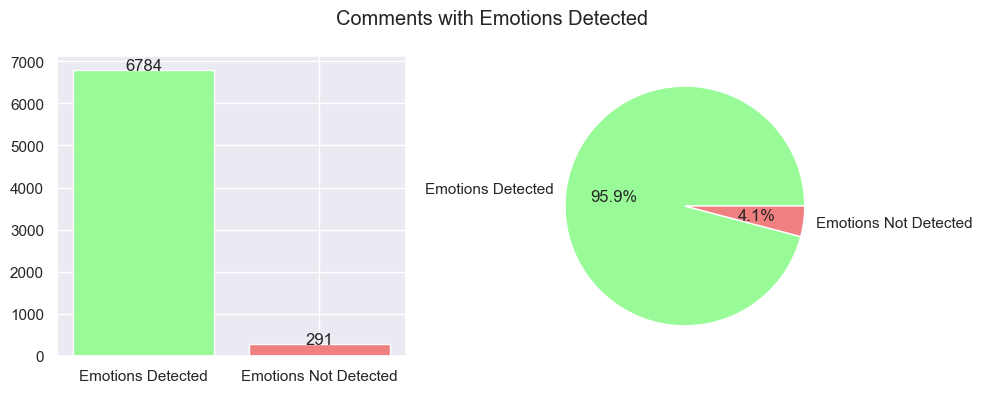

In [98]:
emotions_detected = len(combined_DF[combined_DF['Emotion Recognition'] != 'No emotions detected'] )
emotions_not_detected = len(combined_DF[combined_DF['Emotion Recognition'] == 'No emotions detected'] )

x = ['Emotions Detected', 'Emotions Not Detected']
y = [emotions_detected, emotions_not_detected]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.suptitle('Comments with Emotions Detected')
axes[0].bar(x, y, color=['palegreen', 'lightcoral', 'gray', 'saddlebrown'])
for i, value in enumerate(y):
    axes[0].text(i, value, str(value), ha='center')
axes[1].pie(y, labels=x, autopct='%1.1f%%', colors=['palegreen', 'lightcoral', 'gray', 'saddlebrown'])
fig.tight_layout()
plt.savefig("Comments with Emotions Detected.png")
plt.show()

In [99]:
introspection_order = ["ecstasy", "joy", "contentment", "melancholy", "sadness", "grief"]
df_introspection = emotion_df2[emotion_df2["Emotion"].isin(introspection_order)].reset_index(drop=True)
df_introspection["Emotion"] = pd.Categorical(
    df_introspection["Emotion"], categories=introspection_order, ordered=True
)
df_introspection = df_introspection.sort_values("Emotion").reset_index(drop=True)

temper_order = ["bliss", "calmness", "serenity", "annoyance", "anger", "rage"]
df_temper = emotion_df2[emotion_df2["Emotion"].isin(temper_order)].reset_index(drop=True)
df_temper["Emotion"] = pd.Categorical(
    df_temper["Emotion"], categories=temper_order, ordered=True
)
df_temper = df_temper.sort_values("Emotion").reset_index(drop=True)

attitude_order = ["delight", "pleasantness", "acceptance", "dislike", "disgust", "loathing"]
df_attitude = emotion_df2[emotion_df2["Emotion"].isin(attitude_order)].reset_index(drop=True)
df_attitude["Emotion"] = pd.Categorical(
    df_attitude["Emotion"], categories=attitude_order, ordered=True
)
df_attitude = df_attitude.sort_values("Emotion").reset_index(drop=True)

sensitivity_order = ["enthusiasm", "eagerness", "responsiveness", "anxiety", "fear", "terror"]
df_sensitivity = emotion_df2[emotion_df2["Emotion"].isin(sensitivity_order)].reset_index(drop=True)
df_sensitivity["Emotion"] = pd.Categorical(
    df_sensitivity["Emotion"], categories=sensitivity_order, ordered=True
)
df_sensitivity = df_sensitivity.sort_values("Emotion").reset_index(drop=True)

In [100]:
introspection_total = df_introspection['count'].sum()
positive_introspection = df_introspection[:3]['count'].sum()
negative_introspection = df_introspection[3:]['count'].sum()

temper_total = df_temper['count'].sum()
positive_temper = df_temper[:3]['count'].sum()
negative_temper = df_temper[3:]['count'].sum()

attitude_total = df_attitude['count'].sum()
positive_attitude = df_attitude[:3]['count'].sum()
negative_attitude = df_attitude[3:]['count'].sum()

sensitivity_total = df_sensitivity['count'].sum()
positive_sensitivity = df_sensitivity[:3]['count'].sum()
negative_sensitivity = df_sensitivity[3:]['count'].sum()

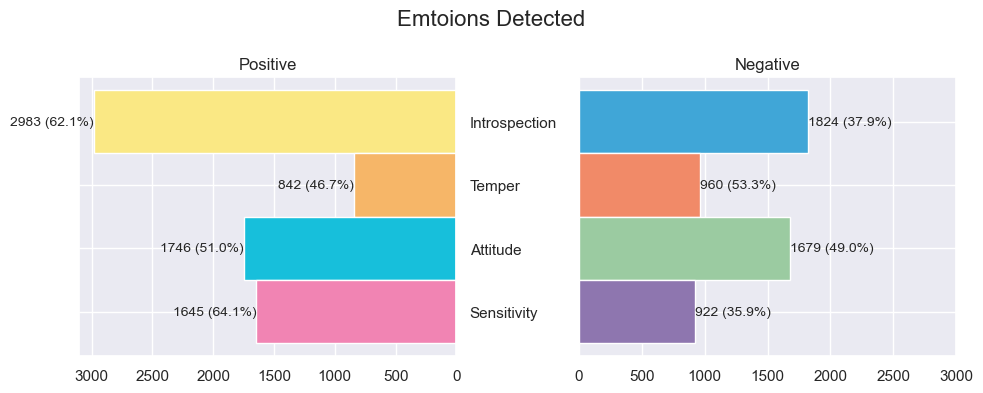

In [101]:
left_side = [positive_introspection, positive_temper, positive_attitude, positive_sensitivity]
right_side = [negative_introspection, negative_temper, negative_attitude, negative_sensitivity]
left_side_labels = ['Introspection', 'Temper', 'Attitude', 'Sensitivity']
left_side_colors = ['#fae884', '#F6B668', '#17BFDB', '#F184B3']
right_side_colors = ['#40A6D7', '#F18A68', '#9BCBA1', '#8E76AF']
right_side_value = ['Extraversion', 'Intuition', 'Feeling', 'Perceiving']
title = "Emtoions Detected"
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.suptitle(title, fontsize=16)
bars_left = axes[0].barh(left_side_labels, left_side, align="center", color=left_side_colors,height=1)
bars_right = axes[1].barh(left_side_labels, right_side, align="center", color=right_side_colors,height=1)
axes[0].set_title('Positive')
axes[1].set_title('Negative')
axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].yaxis.tick_right()
axes[0].tick_params(axis="y", left=False, right=False)
axes[1].tick_params(axis="y", left=False, right=False)
axes[0].set_xlim(3100, 0)
axes[1].set_xlim(0, 3000)
for i, (bar_left, bar_right) in enumerate(zip(bars_left, bars_right)):
    total = left_side[i] + right_side[i]
    left_percentage = (left_side[i] / total) * 100
    right_percentage = (right_side[i] / total) * 100
    axes[0].text(
        bar_left.get_width(),
        bar_left.get_y() + bar_left.get_height() / 2,
        f"{left_side[i]} ({left_percentage:.1f}%)",  
        ha="right", va="center", fontsize=10, 
    )

    axes[1].text(
        bar_right.get_width(),
        bar_right.get_y() + bar_right.get_height() / 2,
        f"{right_side[i]} ({right_percentage:.1f}%)",  
        ha="left", va="center", fontsize=10, 
    )

plt.tight_layout()
fig.savefig(f"output/Emotion Recognition/{title}.png", bbox_inches='tight')
plt.show()

#### Introspection

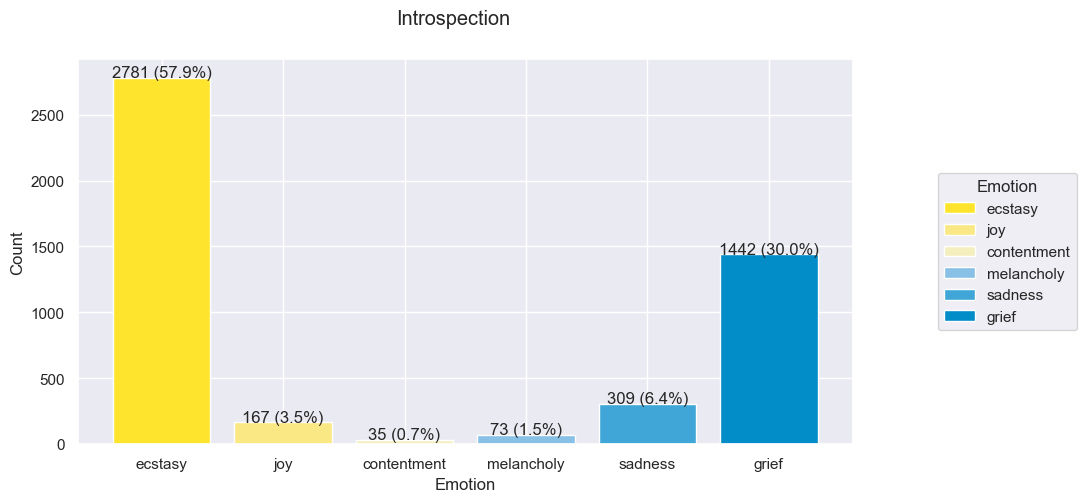

In [31]:
introspection_colors = {
    "ecstasy": "#fee42d",
    "joy": "#fae884",
    "contentment": "#F5EFC0",
    "melancholy": "#88c0e6",
    "sadness": "#40A6D7",
    "grief": "#028CC8"
}

introspection_colors = [introspection_colors[emotion] for emotion in df_introspection["Emotion"]]
total_count = sum(df_introspection['count'])
title = "Introspection"

fig = plt.figure(figsize=(10, 5))
plt.bar(df_introspection['Emotion'], df_introspection['count'], label=introspection_order, color=introspection_colors)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.suptitle(title)
plt.tick_params(axis='x')
plt.legend(title='Emotion', loc='center left', bbox_to_anchor=(1.1, 0.5))

for i, value in enumerate(df_introspection['count']):
    percentage = (value / total_count) * 100  # Calculate percentage
    label = f"{value} ({percentage:.1f}%)"  # Format as "count (percentage%)"
    
    plt.text(i, value + 1, label, ha='center')
fig.savefig(f"output/Emotion Recognition/{title}.png", bbox_inches='tight')
plt.show()

#### Temper

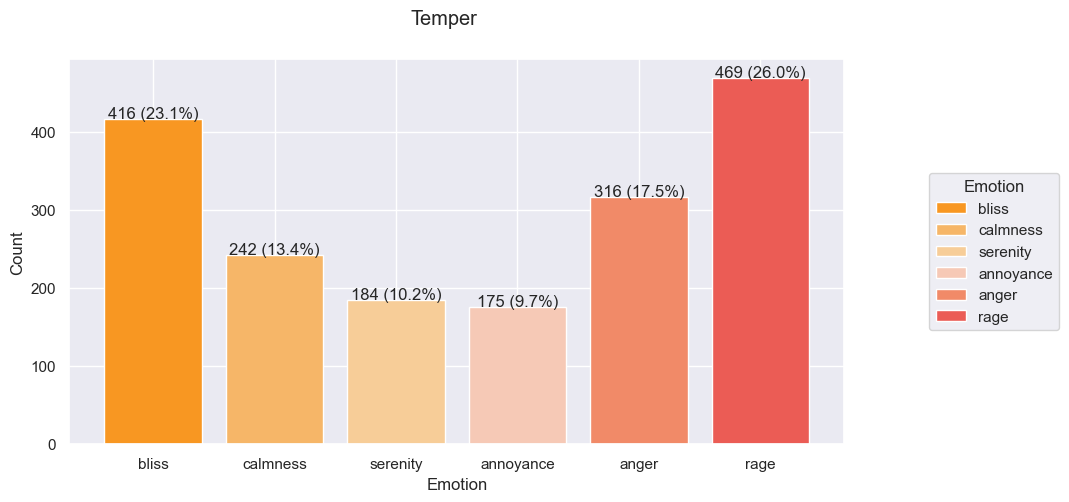

In [32]:
temper_colors = {
    "bliss": "#F89722",
    "calmness": "#F6B668",
    "serenity": "#F7CD98",
    "annoyance": "#F6C9B6",
    "anger": "#F18A68",
    "rage": "#EB5C55"
}

temper_colors = [temper_colors[emotion] for emotion in df_temper["Emotion"]]
total_count = sum(df_temper['count'])
title = "Temper"

fig = plt.figure(figsize=(10, 5))
plt.bar(df_temper['Emotion'], df_temper['count'], label=temper_order, color=temper_colors)
plt.suptitle("Temper")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.legend(title='Emotion', loc='center left', bbox_to_anchor=(1.1, 0.5))

plt.tick_params(axis='x')

for i, value in enumerate(df_temper['count']):
    percentage = (value / total_count) * 100
    label = f"{value} ({percentage:.1f}%)"
    plt.text(i, value + 1, label, ha='center')
fig.savefig(f"output/{title}.png", bbox_inches='tight')
plt.show()

#### Attitude

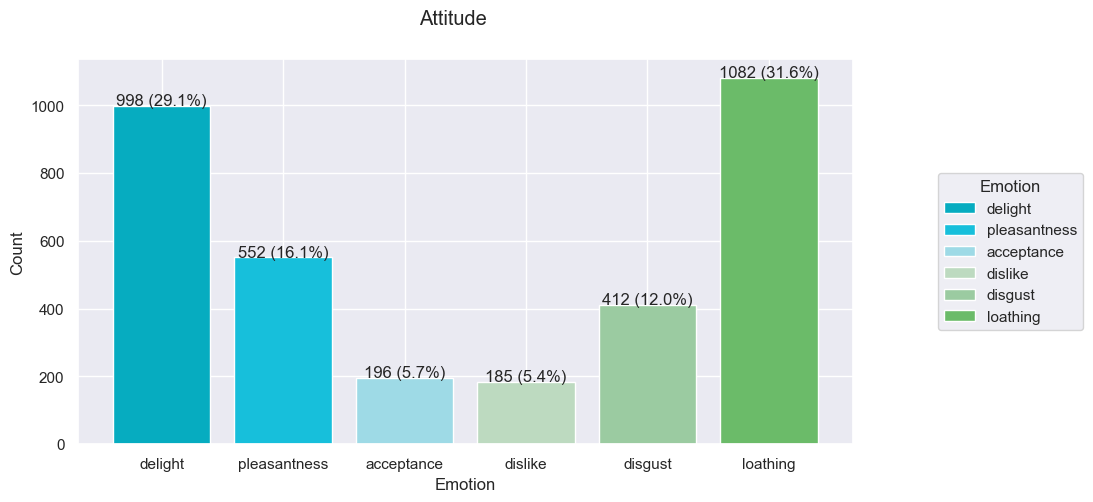

In [33]:
attitude_colors = {
    "delight": "#06ACC0",
    "pleasantness": "#17BFDB",
    "acceptance": "#9EDAE6",
    "dislike": "#BDDAC0",
    "disgust": "#9BCBA1",
    "loathing": "#6BBB69"
}

attitude_colors = [attitude_colors[emotion] for emotion in df_attitude["Emotion"]]
total_count = sum(df_attitude['count'])
title = "Attitude"

fig = plt.figure(figsize=(10, 5))
plt.bar(df_attitude['Emotion'], df_attitude['count'], label=attitude_order,color=attitude_colors)
plt.suptitle("Attitude")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.tick_params(axis='x')
plt.legend(title='Emotion', loc='center left', bbox_to_anchor=(1.1, 0.5))

for i, value in enumerate(df_attitude['count']):
    percentage = (value / total_count) * 100
    label = f"{value} ({percentage:.1f}%)"
    plt.text(i, value + 1, label, ha='center')
fig.savefig(f"output/{title}.png", bbox_inches='tight')
plt.show()

#### Sensitivity

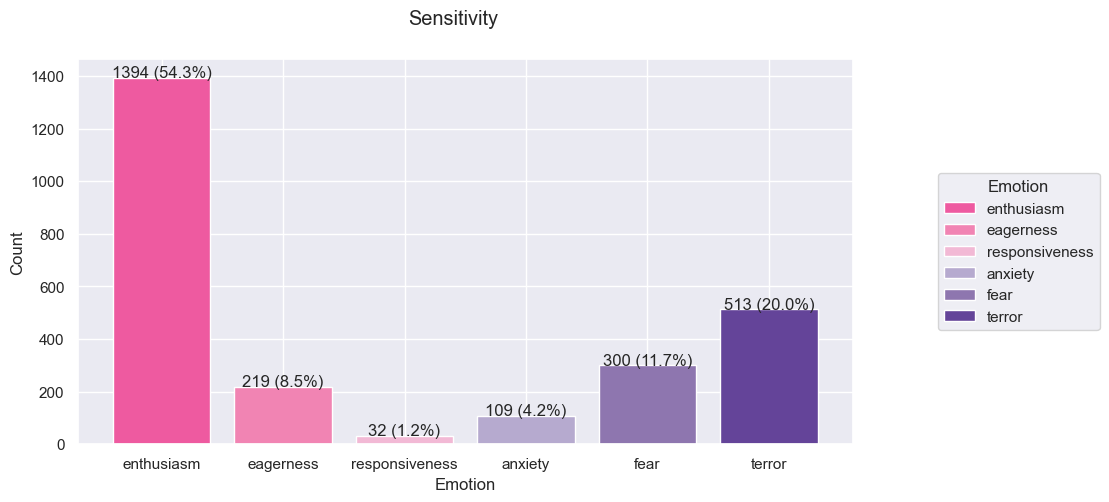

In [34]:
sensitivity_colors = {
    "enthusiasm": "#EE5AA0",
    "eagerness": "#F184B3",
    "responsiveness": "#F2B9D5",
    "anxiety": "#B6AACF",
    "fear": "#8E76AF",
    "terror": "#644499"
}

sensitivity_colors = [sensitivity_colors[emotion] for emotion in df_sensitivity["Emotion"]]
total_count = sum(df_sensitivity['count'])
title = "Sensitivity"

fig = plt.figure(figsize=(10, 5))
plt.bar(df_sensitivity['Emotion'], df_sensitivity['count'], label=sensitivity_order, color=sensitivity_colors)
plt.suptitle("Sensitivity")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.tick_params(axis='x')
plt.legend(title='Emotion', loc='center left', bbox_to_anchor=(1.1, 0.5))
for i, value in enumerate(df_sensitivity['count']):
    percentage = (value / total_count) * 100
    label = f"{value} ({percentage:.1f}%)"
    plt.text(i, value + 1, label, ha='center')
fig.savefig(f"output/{title}.png", bbox_inches='tight')
plt.show()

### Personality Detection

#### Overall

In [35]:
personality_predicted = len(combined_DF[combined_DF['Personality Prediction'] != 'No personality trait detected'] )
print("Personality detected", personality_predicted)

personality_not_predicted = len(combined_DF[combined_DF['Personality Prediction'] == 'No personality trait detected'] )
print("Personality not detected:", personality_not_predicted)

Personality detected 6787
Personality not detected: 288


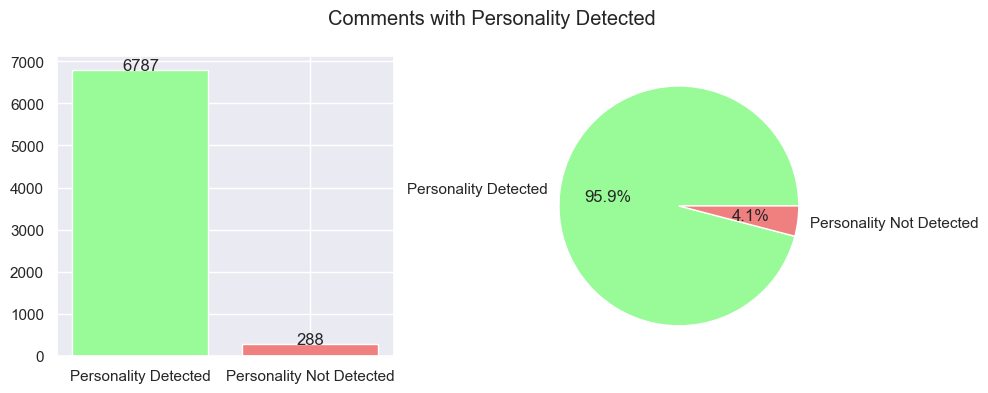

In [36]:
x = ['Personality Detected', 'Personality Not Detected']
y = [personality_predicted, personality_not_predicted]
title = 'Comments with Personality Detected'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.suptitle(title)
axes[0].bar(x, y, color=['palegreen', 'lightcoral', 'gray', 'saddlebrown'])
for i, value in enumerate(y):
    axes[0].text(i, value, str(value), ha='center')
axes[1].pie(y, labels=x, autopct='%1.1f%%', colors=['palegreen', 'lightcoral', 'gray', 'saddlebrown'])
plt.tight_layout()
fig.savefig(f"output/Personality/{title}.png", bbox_inches='tight')
plt.show()

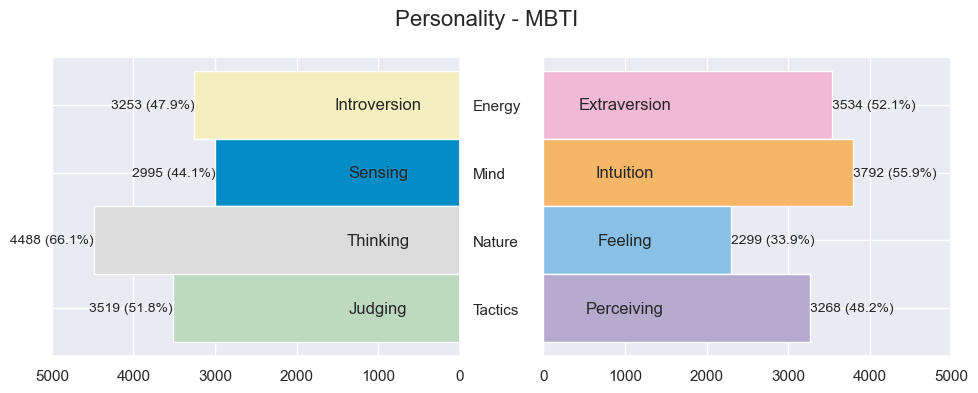

In [38]:
energy_count = personality_df2['Energy'].value_counts()
mind_count = personality_df2['Mind'].value_counts()
nature_count = personality_df2['Nature'].value_counts()
tactics_count = personality_df2['Tactics'].value_counts()
left_side = [energy_count['I'], mind_count['S'], nature_count['T'], tactics_count['J']]
left_side_labels = ['Energy', 'Mind', 'Nature', 'Tactics']
left_side_colors = ['#F5EFC0', '#028CC8', '#DCDCDC', '#BDDAC0']
left_side_value = ['Introversion', 'Sensing', 'Thinking', 'Judging']
right_side = [energy_count['E'], mind_count['N'], nature_count['F'], tactics_count['P']]
right_side_colors = ['#F2B9D5', '#F6B668', '#88C0E6', '#B6AACF']
right_side_value = ['Extraversion', 'Intuition', 'Feeling', 'Perceiving']
title = "Personality - MBTI"
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.suptitle(title, fontsize=16)
bars_left = axes[0].barh(left_side_labels, left_side, align="center", color=left_side_colors,height=1)
bars_right = axes[1].barh(left_side_labels, right_side, align="center", color=right_side_colors,height=1)
axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].yaxis.tick_right()
axes[0].tick_params(axis="y", left=False, right=False)
axes[1].tick_params(axis="y", left=False, right=False)
axes[0].set_xlim(5000, 0)
axes[1].set_xlim(0, 5000)
for i, (bar_left, bar_right) in enumerate(zip(bars_left, bars_right)):
    total = left_side[i] + right_side[i]
    left_percentage = (left_side[i] / total) * 100
    right_percentage = (right_side[i] / total) * 100
    axes[0].text(
        bar_left.get_width(),
        bar_left.get_y() + bar_left.get_height() / 2,
        f"{left_side[i]} ({left_percentage:.1f}%)",  
        ha="right", va="center", fontsize=10, 
    )
    axes[0].text(
        1000,
        bar_left.get_y() + bar_left.get_height() / 2,
        f"{left_side_value[i]}",  
        ha="center", va="center", fontsize=12, 
    )
    axes[1].text(
        bar_right.get_width(),
        bar_right.get_y() + bar_right.get_height() / 2,
        f"{right_side[i]} ({right_percentage:.1f}%)",  
        ha="left", va="center", fontsize=10, 
    )
    axes[1].text(
        1000,
        bar_left.get_y() + bar_left.get_height() / 2,
        f"{right_side_value[i]}",
        ha="center", va="center", fontsize=12, 
    )
plt.tight_layout()
fig.savefig(f"output/Personality/{title}.png", bbox_inches='tight')
plt.show()

#### Energy

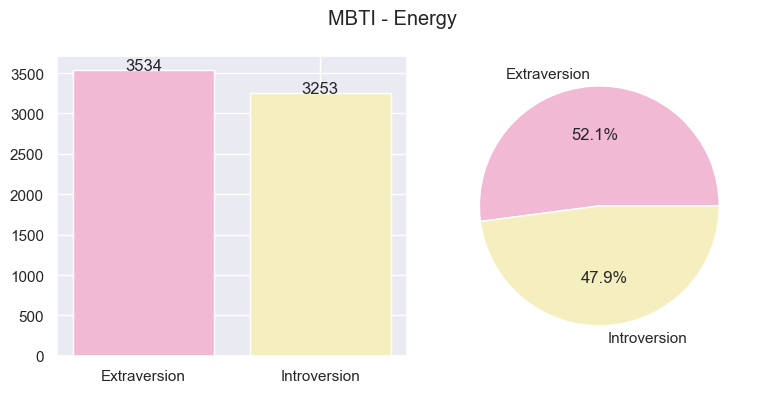

In [39]:
y = personality_df2['Energy'].value_counts()
labels = ['Extraversion' if x == 'E' else 'Introversion' for x in y.index]
ordered_labels = ['Extraversion', 'Introversion']
ordered_y = [y['E'], y['I']]
graph_color = ['#F2B9D5', '#F5EFC0']
title = 'MBTI - Energy'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
fig.suptitle(title)
axes[0].bar(ordered_labels, ordered_y, color=graph_color,)
for i, value in enumerate(ordered_y):
    axes[0].text(i, value, str(value), ha='center')
axes[1].pie(ordered_y, labels=ordered_labels, autopct='%1.1f%%', colors=graph_color)
plt.tight_layout()
fig.savefig(f"output/Personality/{title}.png", bbox_inches='tight')
plt.show()

#### Mind

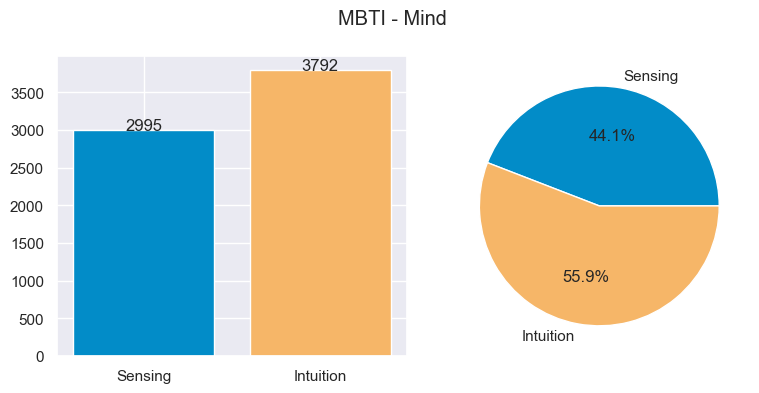

In [40]:
y = personality_df2['Mind'].value_counts()
labels = ['Sensing' if x == 'S' else 'Intuition' for x in y.index]
ordered_labels = ['Sensing', 'Intuition']
ordered_y = [y['S'], y['N']]
graph_color = ['#028CC8', '#F6B668']
title = 'MBTI - Mind'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
fig.suptitle(title)
axes[0].bar(ordered_labels, ordered_y, color=graph_color)
for i, value in enumerate(ordered_y):
    axes[0].text(i, value, str(value), ha='center')
axes[1].pie(ordered_y, labels=ordered_labels, autopct='%1.1f%%', colors=graph_color)
plt.tight_layout()
fig.savefig(f"output/Personality/{title}.png", bbox_inches='tight')
plt.show()

#### Nature

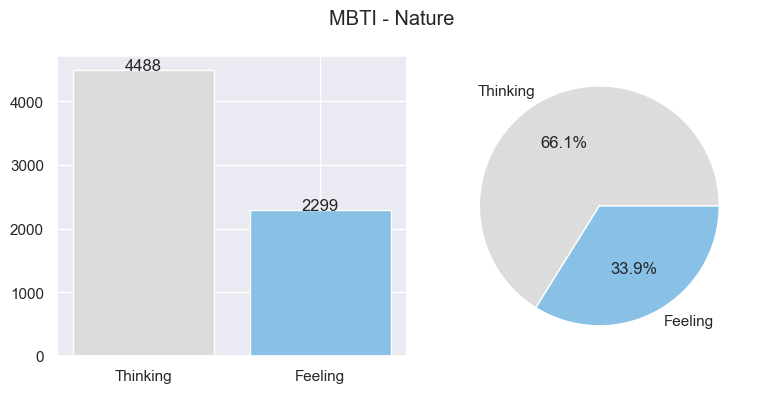

In [41]:
y = personality_df2['Nature'].value_counts()
labels = ['Thinking' if x == 'T' else 'Feeling' for x in y.index]
ordered_labels = ['Thinking', 'Feeling']
ordered_y = [y['T'], y['F']]
graph_color = ['#DCDCDC', '#88C0E6']
title = 'MBTI - Nature'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
fig.suptitle(title)
axes[0].bar(ordered_labels, ordered_y, color=graph_color)
for i, value in enumerate(ordered_y):
    axes[0].text(i, value, str(value), ha='center')
axes[1].pie(ordered_y, labels=ordered_labels, autopct='%1.1f%%', colors=graph_color)
plt.tight_layout()
fig.savefig(f"output/Personality/{title}.png", bbox_inches='tight')
plt.show()

#### Tactics

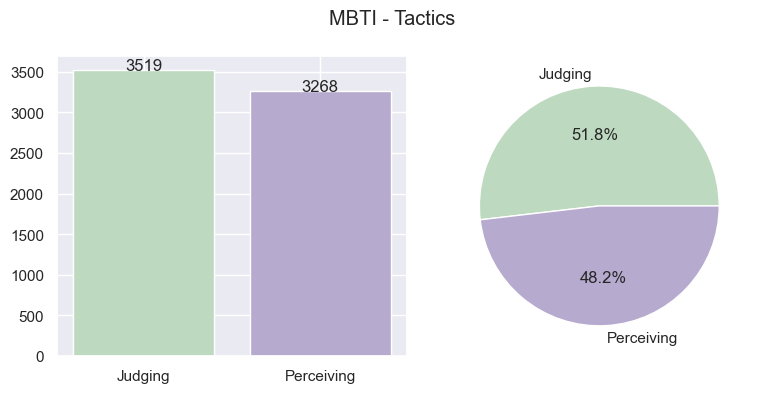

In [42]:
y = personality_df2['Tactics'].value_counts()
labels = ['Judging' if x == 'J' else 'Perceiving' for x in y.index]
ordered_labels = ['Judging', 'Perceiving']
ordered_y = [y['J'], y['P']]
graph_color = ['#BDDAC0', '#B6AACF']
title = 'MBTI - Tactics'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
fig.suptitle(title)
axes[0].bar(ordered_labels, ordered_y, color=graph_color)
for i, value in enumerate(ordered_y):
    axes[0].text(i, value, str(value), ha='center')
axes[1].pie(ordered_y, labels=ordered_labels, autopct='%1.1f%%', colors=graph_color)
plt.tight_layout()
fig.savefig(f"output/Personality/{title}.png", bbox_inches='tight')
plt.show()

### Subjectivity Detection

In [47]:
subjectivity_df = pd.DataFrame(combined_DF['Subjectivity Detection'].copy())
subjectivity_df = subjectivity_df['Subjectivity Detection'].value_counts().reset_index()
subjectivity_df.columns = ['Subjectivity', 'Count']

subjectivity_order = ['SUBJECTIVE', 'OBJECTIVE', 'AMBIVALENT']
subjectivity_df["Subjectivity"] = pd.Categorical(
    subjectivity_df["Subjectivity"], categories=subjectivity_order, ordered=True
)
subjectivity_df=subjectivity_df.sort_values("Subjectivity")

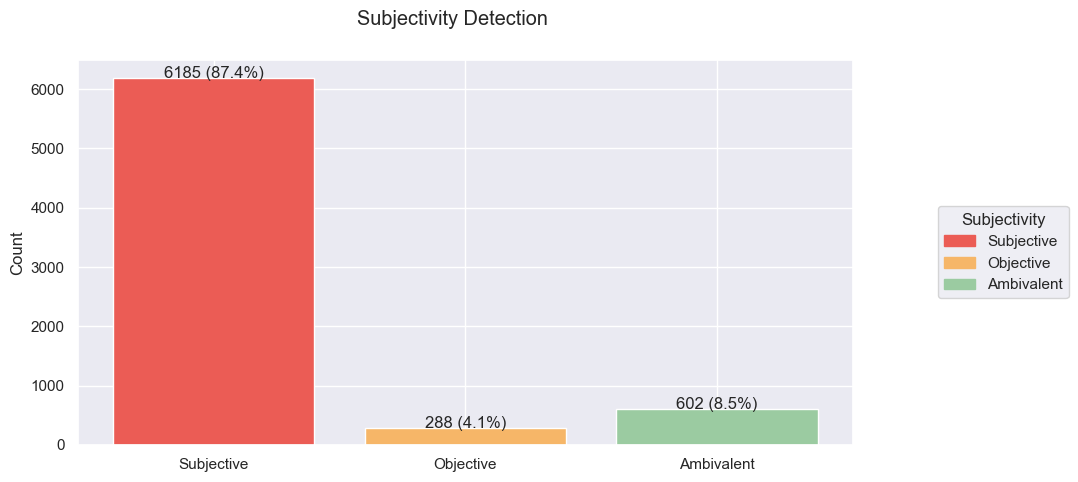

In [48]:
subjectivity_colors = ["#EB5C55", "#F6B668", "#9BCBA1"]

total_count = sum(df_introspection['count'])
title = "Subjectivity Detection"
total_count = combined_DF['Subjectivity Detection'].count()
ordered_labels = ['Subjective' if x == 'SUBJECTIVE' else 'Ambivalent' if x == 'AMBIVALENT' else 'Objective' for x in subjectivity_df.Subjectivity]
fig = plt.figure(figsize=(10, 5))
plt.bar(ordered_labels, subjectivity_df['Count'], label=ordered_labels, color=subjectivity_colors)
plt.ylabel("Count")
plt.suptitle(title)
plt.tick_params(axis='x')
plt.legend([plt.Rectangle((0, 0), 1, 1, color=color) for color in subjectivity_colors],
           ordered_labels,
           title="Subjectivity",
           bbox_to_anchor=(1.1, 0.5),
           loc="center left")
for i, value in enumerate(subjectivity_df['Count']):
    percentage = (value / total_count) * 100
    label = f"{value} ({percentage:.1f}%)"
    plt.text(i, value + 1, label, ha='center')
fig.savefig(f"output/Subjectivity/{title}.png", bbox_inches='tight')
plt.show()

### Polarity Classification

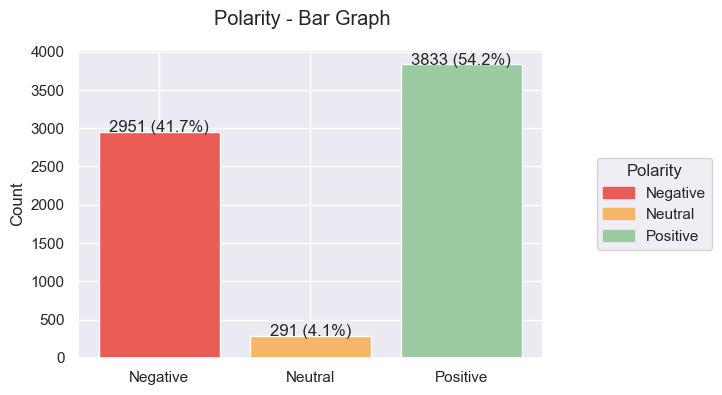

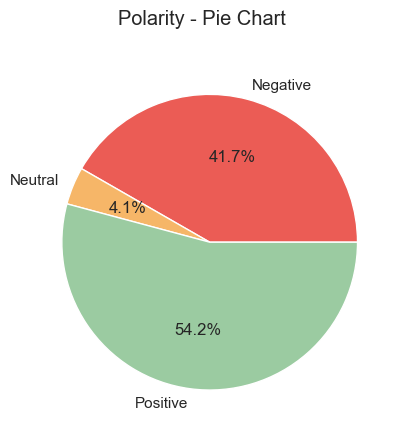

In [49]:
polarity_df = pd.DataFrame(combined_DF['Polarity Classification'].copy())
polarity_df = polarity_df['Polarity Classification'].value_counts().reset_index()
polarity_df.columns = ['Polarity', 'Count']
polarity_order = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
polarity_df["Polarity"] = pd.Categorical(
    polarity_df["Polarity"], categories=polarity_order, ordered=True
)
polarity_df=polarity_df.sort_values("Polarity")

total_count = combined_DF['Polarity Classification'].count()
ordered_labels = ['Positive' if x == 'POSITIVE' else 'Negative' if x == 'NEGATIVE' else 'Neutral' for x in polarity_df.Polarity]
polarity_colors = ['#EB5C55', '#F6B668', '#9BCBA1']
fig = plt.figure(figsize=(6, 4))
plt.bar(ordered_labels, polarity_df['Count'], color=polarity_colors)
plt.ylabel("Count")
suptitle = "Polarity - Bar Graph"
plt.suptitle(suptitle)
plt.tick_params(axis='x')
plt.legend([plt.Rectangle((0, 0), 1, 1, color=color) for color in polarity_colors],
           ordered_labels,
           title="Polarity",
           bbox_to_anchor=(1.1, 0.5),
           loc="center left")
for i, value in enumerate(polarity_df['Count']):
    percentage = (value / total_count) * 100
    label = f"{value} ({percentage:.1f}%)"
    plt.text(i, value + 1, label, ha='center')
fig.savefig(f"output/Polarity Classification/{suptitle}.png", bbox_inches='tight')
plt.show()
plt.pie(polarity_df['Count'], labels=ordered_labels, autopct='%1.1f%%', colors=polarity_colors)
suptitle = "Polarity - Pie Chart"
plt.suptitle(suptitle)
plt.savefig(f"output/Polarity Classification/{suptitle}.png", bbox_inches='tight')
plt.show()

### Depression Categorization

In [50]:
depression = pd.DataFrame(combined_DF['Depression Categorization'].copy())

depression.reset_index(drop=True)

,Depression Categorization
0,0
1,0
2,0
3,0
4,0
...,...
7070,50
7071,0
7072,0
7073,0


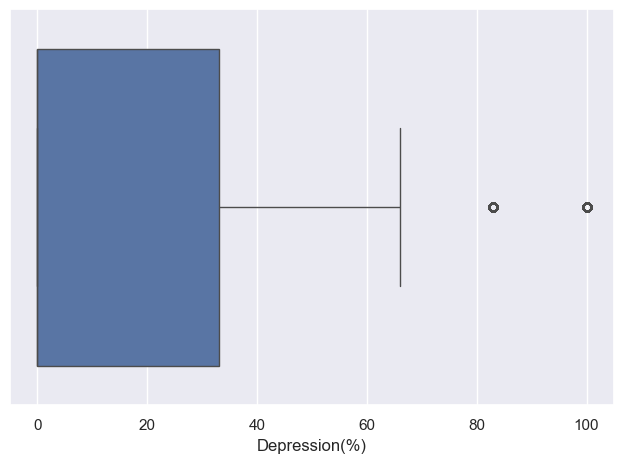

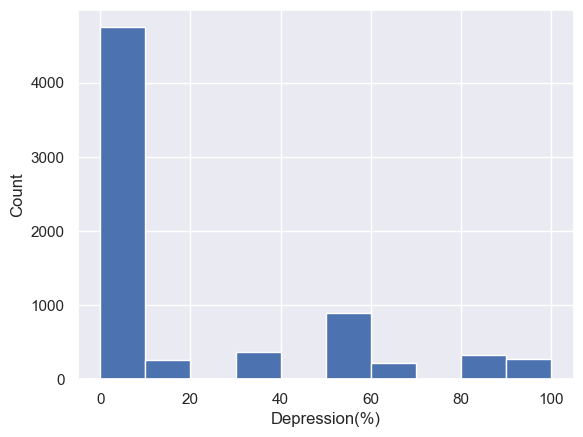

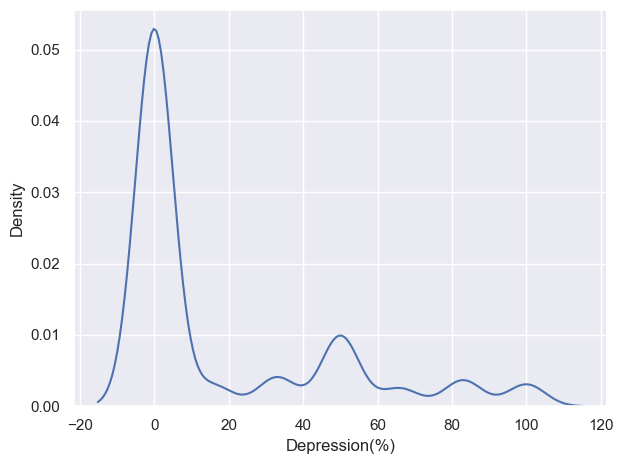

In [51]:
depression.columns = ['Depression(%)']

sb.boxplot(data = depression, x="Depression(%)")
plt.tight_layout()
plt.show()
plt.hist(depression)
plt.xlabel("Depression(%)")
plt.ylabel("Count")
plt.show()
sb.kdeplot(data =depression, x="Depression(%)")
plt.tight_layout()
plt.show()

### Toxicity Spotting

In [52]:
combined_DF['Toxicity Spotting'].reset_index(drop=True).describe()

count    7075.000000
mean       17.827703
std        28.221961
min         0.000000
25%         0.000000
50%         0.000000
75%        33.000000
max       100.000000
Name: Toxicity Spotting, dtype: float64

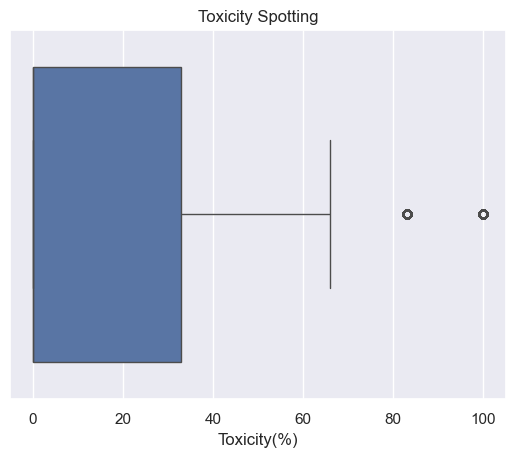

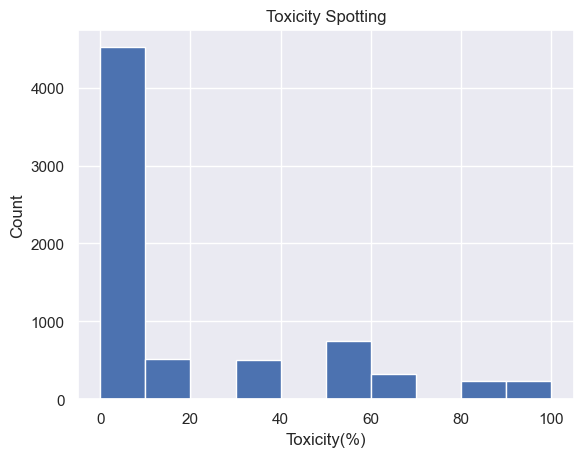

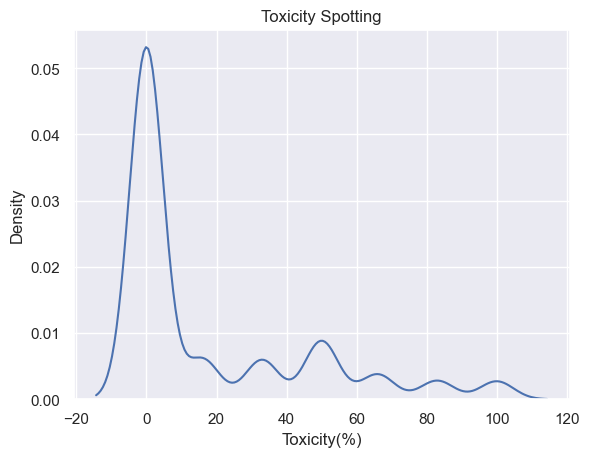

In [53]:
y = combined_DF['Toxicity Spotting'].reset_index(drop=True)

title = "Toxicity Spotting"
plt.title(title)
plt.xlabel("Toxicity(%)")
sb.boxplot(data = y, orient = "h")
plt.savefig(f"output/Toxicity Spotting/{title}_boxplot.png", bbox_inches='tight')
plt.show()

plt.hist(y)
plt.title("Toxicity Spotting")
plt.xlabel("Toxicity(%)")
plt.ylabel("Count")
plt.savefig(f"output/Toxicity Spotting/{title}_histogram.png", bbox_inches='tight')
plt.show() 

sb.kdeplot(data = y)
plt.title("Toxicity Spotting")
plt.xlabel("Toxicity(%)")
plt.savefig(f"output/Toxicity Spotting/{title}_kdeplot.png", bbox_inches='tight')
plt.show()

### Intensity Ranking

In [54]:
combined_DF['Intensity Ranking'].value_counts().reset_index().describe()

,index,Intensity Ranking
count,111.000000,111.000000
mean,44.081081,63.738739
std,33.720006,67.032111
min,-31.000000,1.000000
25%,17.500000,12.500000
50%,45.000000,29.000000
75%,72.500000,109.500000
max,100.000000,292.000000


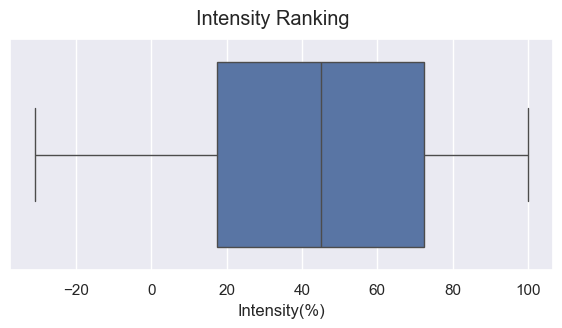

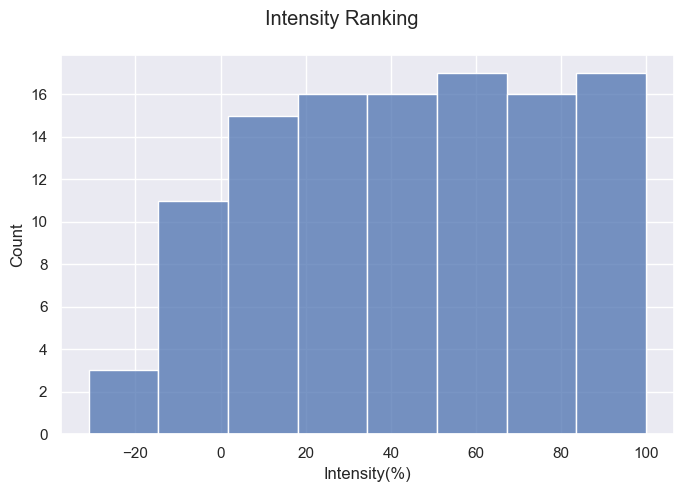

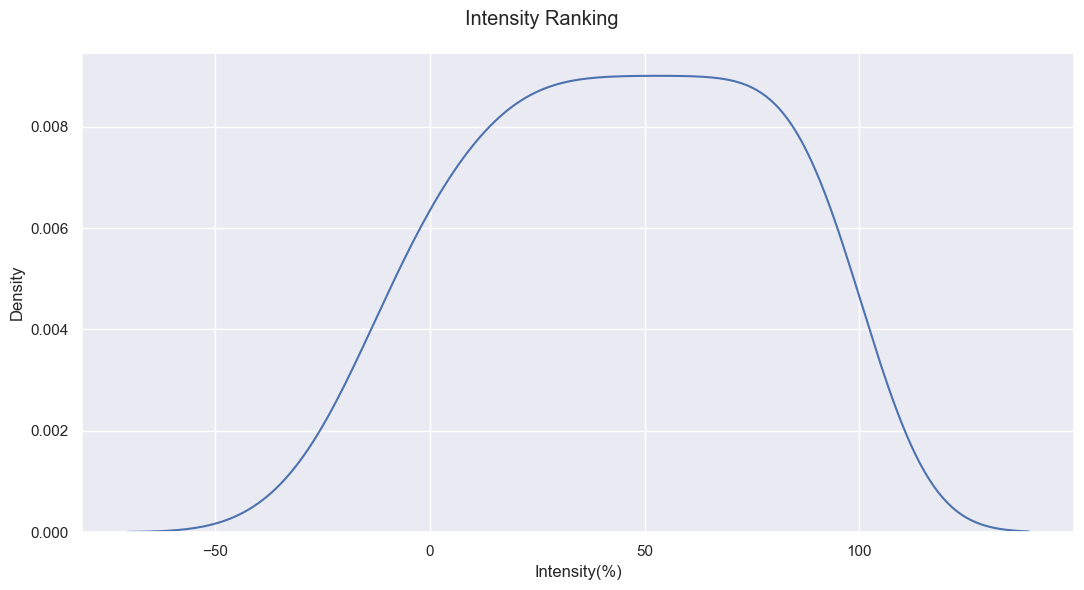

In [55]:
y = combined_DF['Intensity Ranking'].value_counts().reset_index()
y.columns = ['Intensity(%)', 'Count']
title = "Intensity Ranking"

f = plt.figure(figsize=(7, 3))
plt.suptitle(title)
sb.boxplot(data = y, x="Intensity(%)")
# plt.tight_layout()
plt.savefig(f"output/Intensity Ranking/{title}_boxplot.png", bbox_inches='tight')
plt.show()

f = plt.figure(figsize=(7, 5))
sb.histplot(data=y, x="Intensity(%)")
plt.suptitle("Intensity Ranking")
plt.tight_layout()
plt.savefig(f"output/Intensity Ranking/{title}_histplot.png", bbox_inches='tight')
plt.show()

f = plt.figure(figsize=(11, 6))
plt.suptitle(title)
sb.kdeplot(data = y, x="Intensity(%)")
plt.tight_layout()
plt.savefig(f"output/Intensity Ranking/{title}_kdeplot.png", bbox_inches='tight')
plt.show()

### Sarcasm Identification

#### Sarcasm Detected vs Sarcasm Not Detected

In [60]:
sarcasm_detected = len(combined_DF[combined_DF['Sarcasm Detection'] != 0] )
sarcasm_not_detected = len(combined_DF[combined_DF['Sarcasm Detection'] == 0] )

Sarcasm detected 698
Sarcasm not detected: 6377


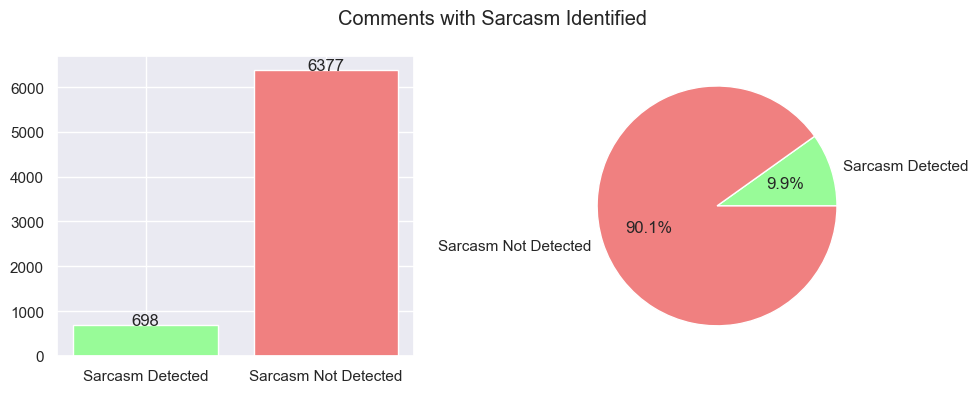

In [61]:
x = ['Sarcasm Detected', 'Sarcasm Not Detected']
y = [sarcasm_detected, sarcasm_not_detected]
title = 'Comments with Sarcasm Identified'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.suptitle(title)
axes[0].bar(x, y, color=['palegreen', 'lightcoral', 'gray', 'saddlebrown'])
for i, value in enumerate(y):
    axes[0].text(i, value, str(value), ha='center')
axes[1].pie(y, labels=x, autopct='%1.1f%%', colors=['palegreen', 'lightcoral', 'gray', 'saddlebrown'])
fig.tight_layout()
fig.savefig(f"output/Sarcasm/{title}.png", bbox_inches='tight')

#### Analysis of Comments with Sacarsm Detected

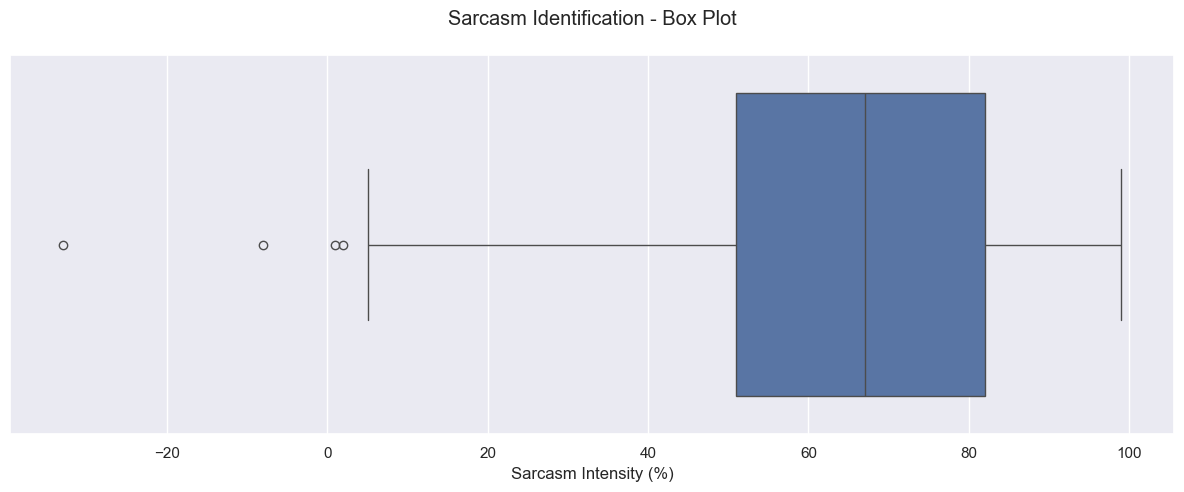

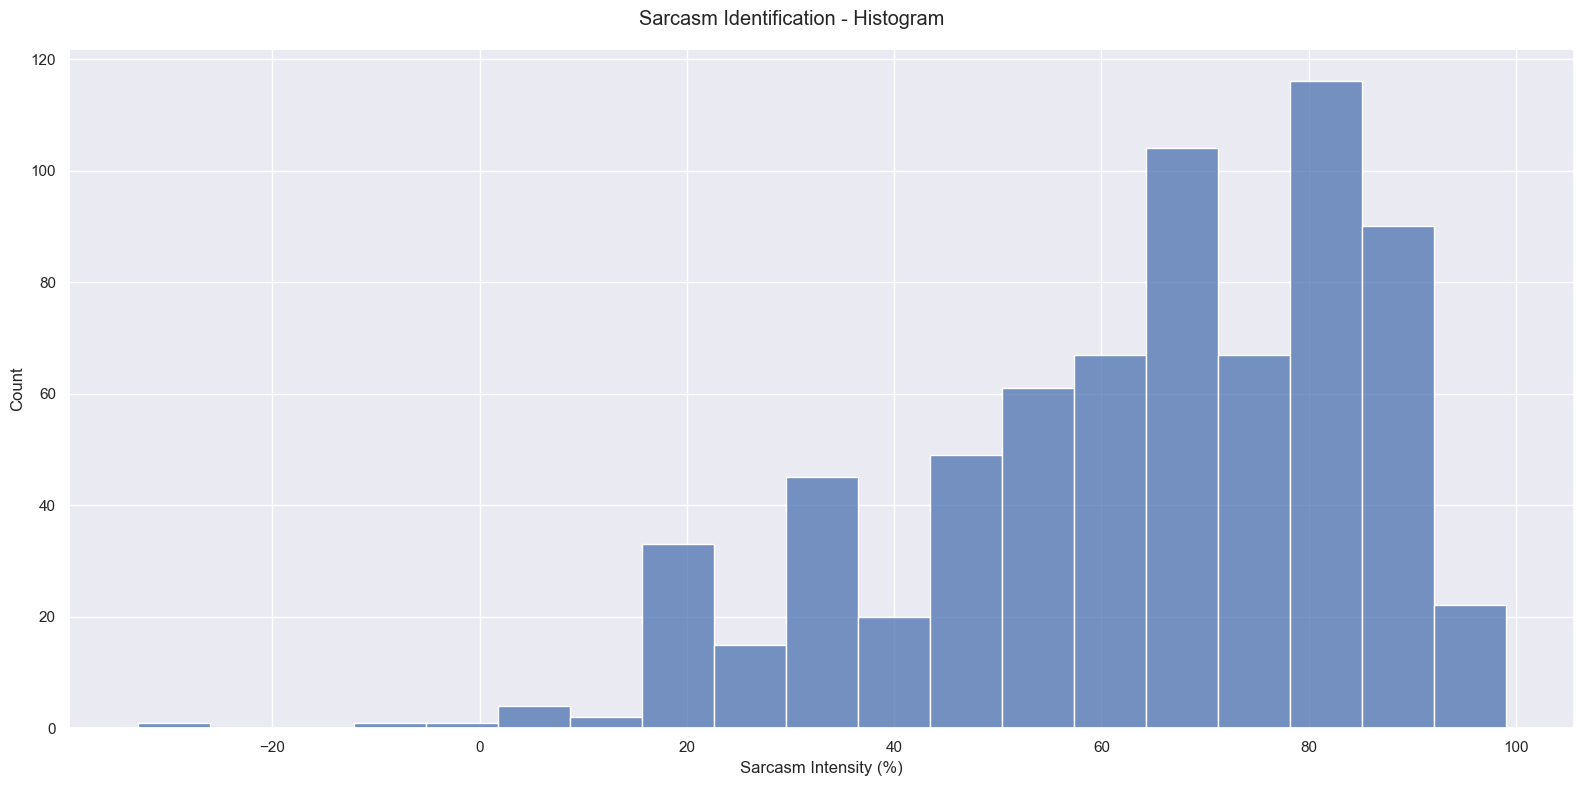

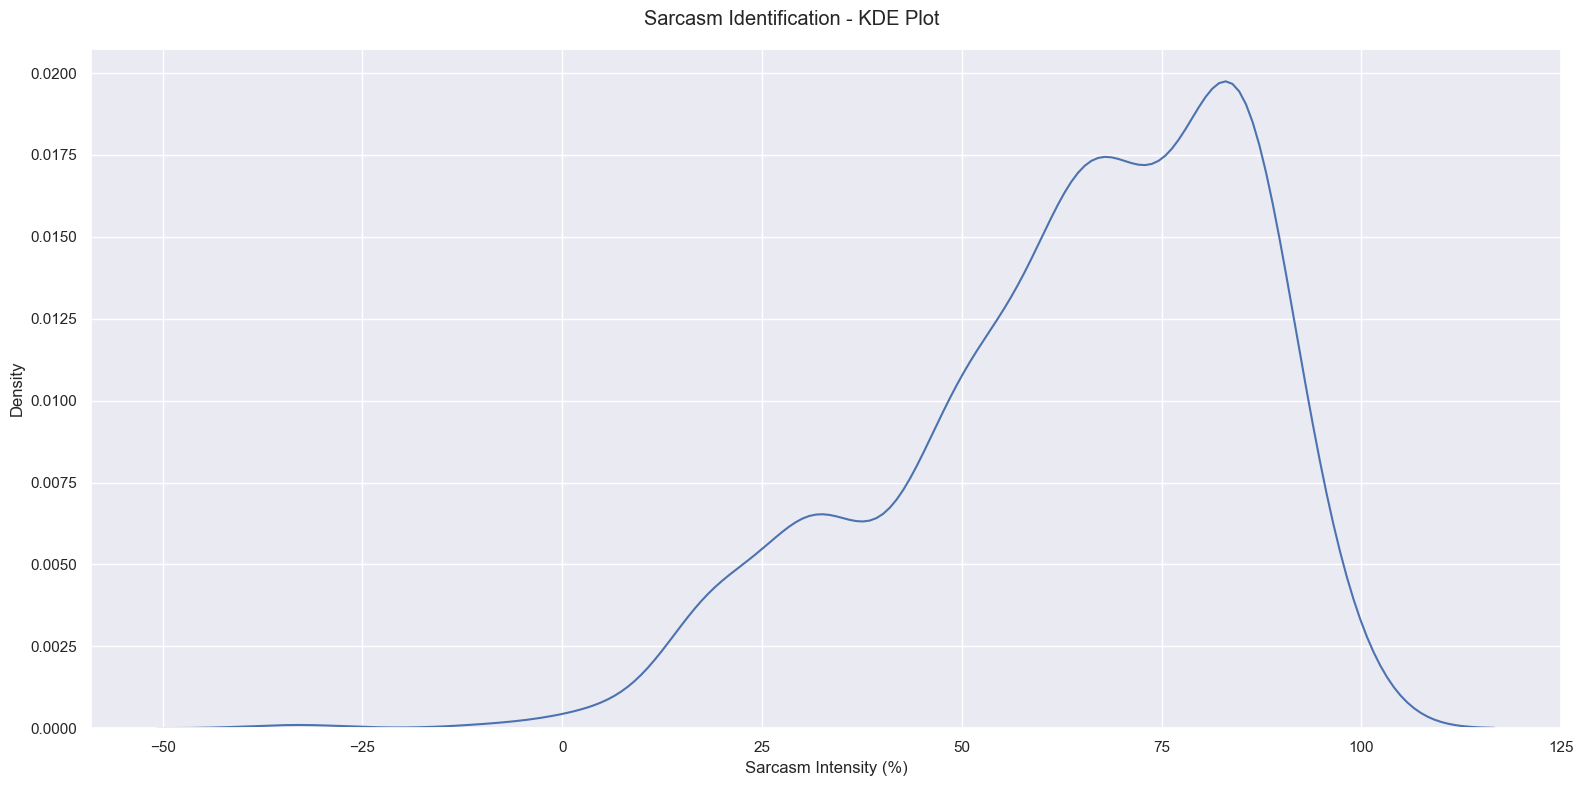

In [62]:
sarcasm_positive = combined_DF['Sarcasm Detection'].copy()
index = sarcasm_positive[(sarcasm_positive)==0].index

sarcasm_positive.drop(index, inplace = True)
title = 'Sarcasm Identification - Box Plot'
f = plt.figure(figsize=(12, 5))
sb.boxplot(data = sarcasm_positive, orient = "h",).set(
    xlabel='Sarcasm Intensity (%)', 
    ylabel='',
    
)
f.suptitle(title)
plt.tight_layout()
plt.show()
title = 'Sarcasm Identification - Histogram'
f = plt.figure(figsize=(16, 8))
sb.histplot(data = sarcasm_positive).set(
    xlabel='Sarcasm Intensity (%)',
)
f.suptitle(title)
plt.tight_layout()
f.savefig(f"output/Sarcasm/{title}.png", bbox_inches='tight')
plt.show()
title = 'Sarcasm Identification - KDE Plot'
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = sarcasm_positive).set(
    xlabel='Sarcasm Intensity (%)',
)
f.suptitle(title)
plt.tight_layout()
f.savefig(f"output/Sarcasm/{title}.png", bbox_inches='tight')
plt.show()

In [63]:
sarcasm_positive.describe()


count    698.000000
mean      63.909742
std       21.799639
min      -33.000000
25%       51.000000
50%       67.000000
75%       82.000000
max       99.000000
Name: Sarcasm Detection, dtype: float64

### Engagement Measurement

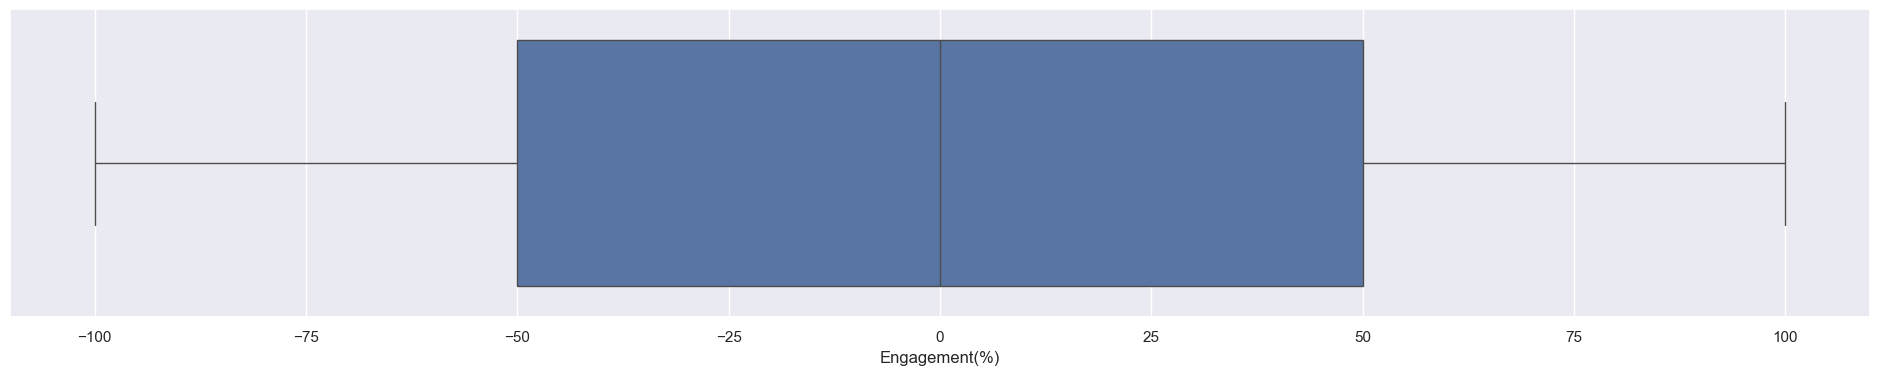

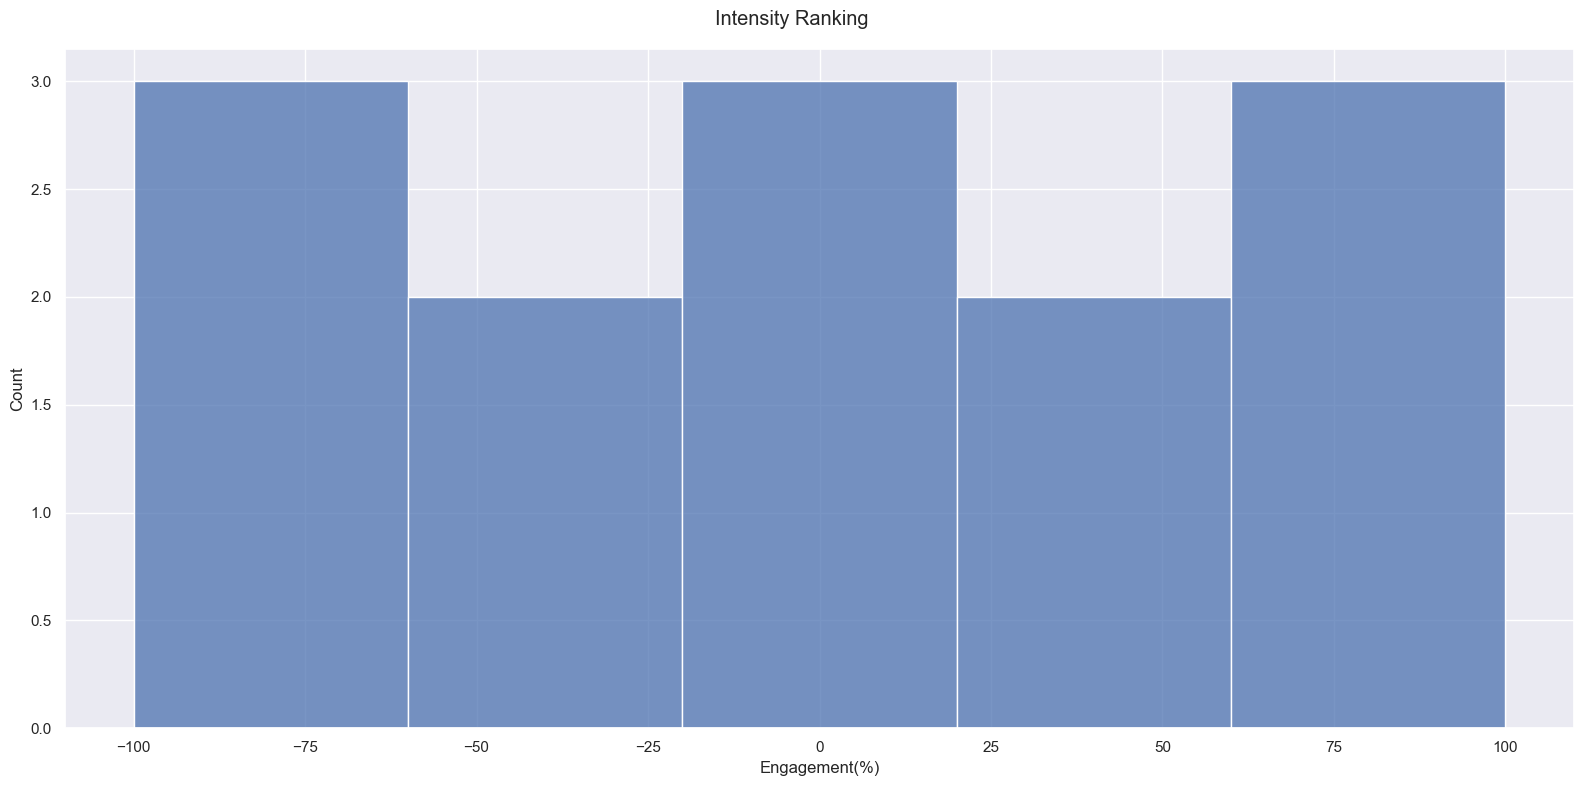

<Axes: xlabel='Engagement(%)', ylabel='Density'>

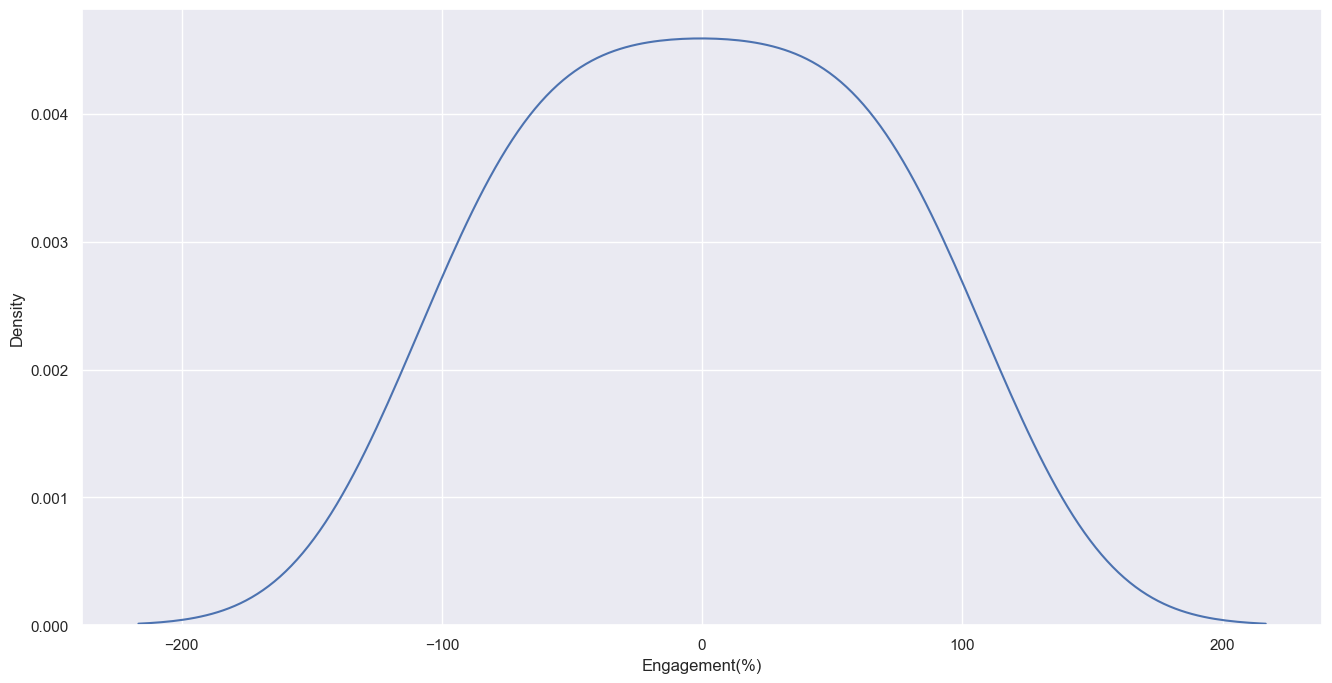

In [64]:
engagement_DF = combined_DF['Engagement Measurement'].value_counts().reset_index()
engagement_DF.columns = ['Engagement(%)', 'Count']
# print(engagement_DF)
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = engagement_DF, x="Engagement(%)")
f = plt.figure(figsize=(16, 8))
sb.histplot(data=engagement_DF, x="Engagement(%)")
plt.suptitle("Intensity Ranking")
plt.tight_layout()
plt.show()
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = engagement_DF, x="Engagement(%)")

### Well-Being Assessment

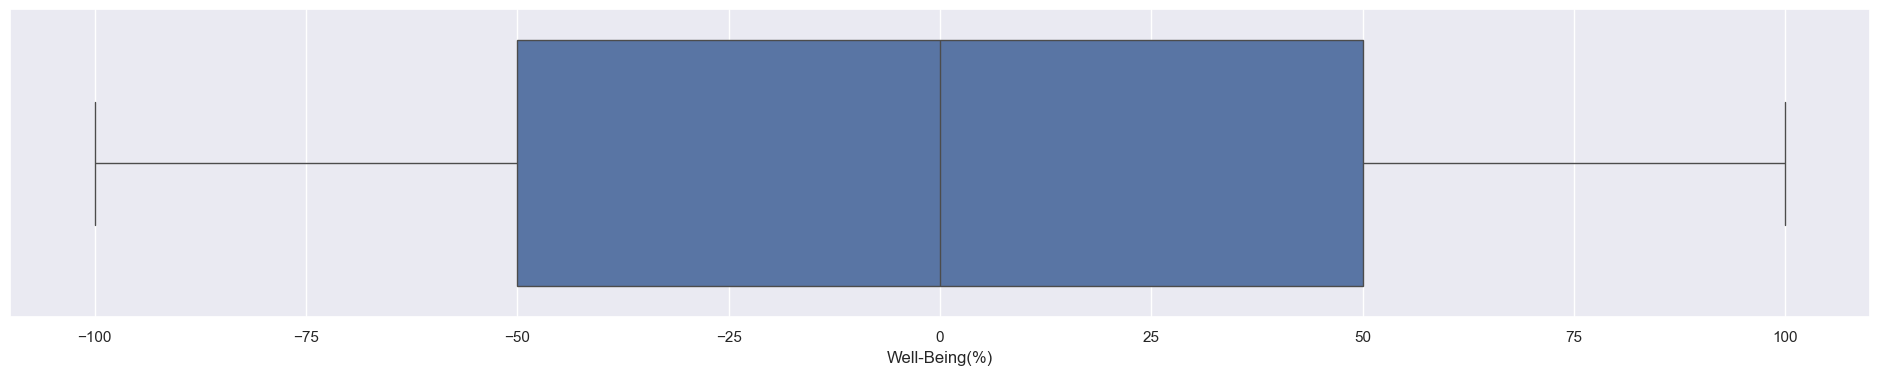

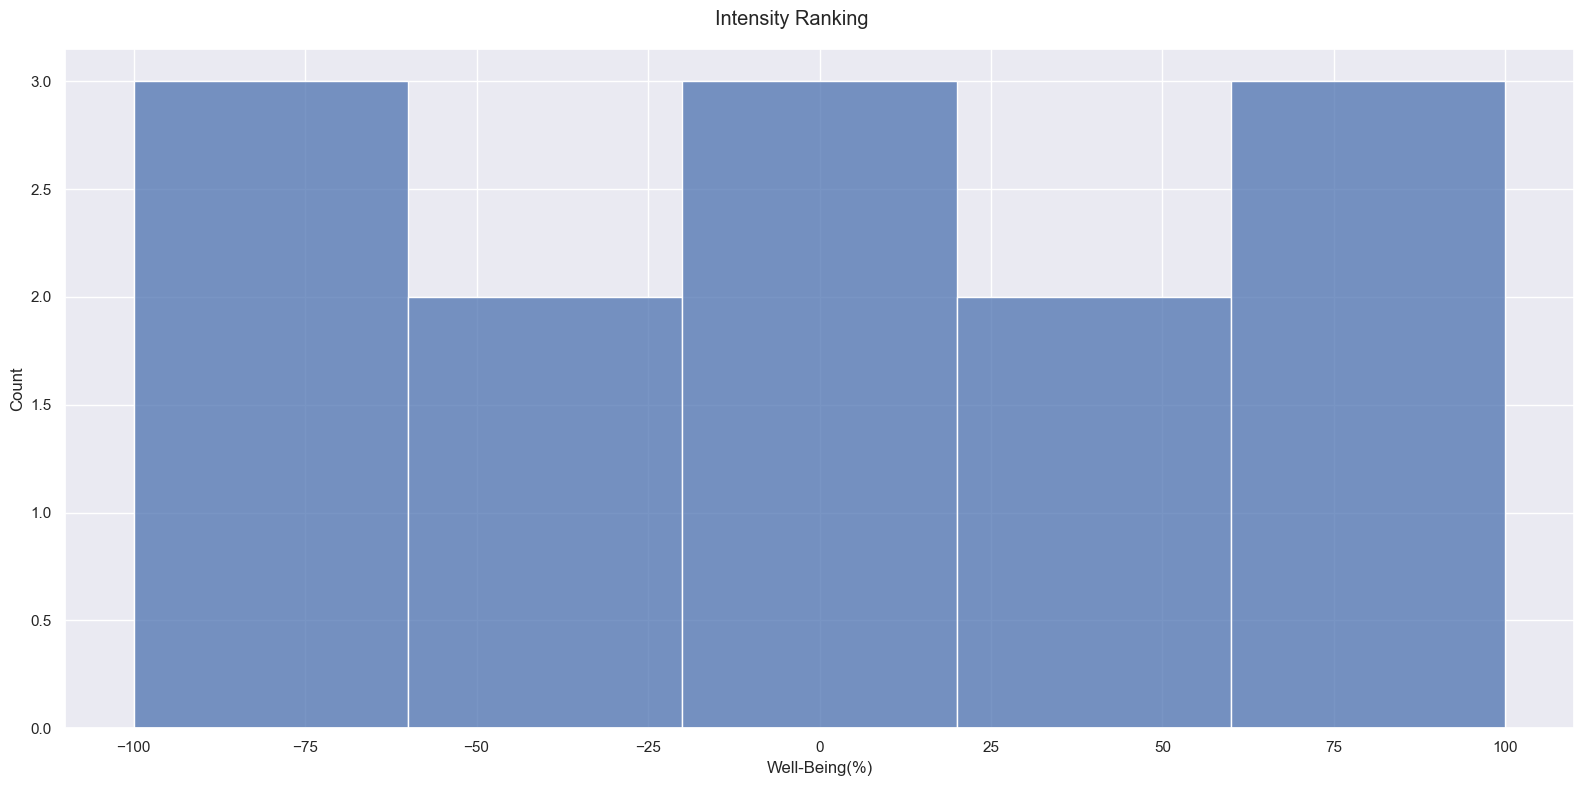

<Axes: xlabel='Well-Being(%)', ylabel='Density'>

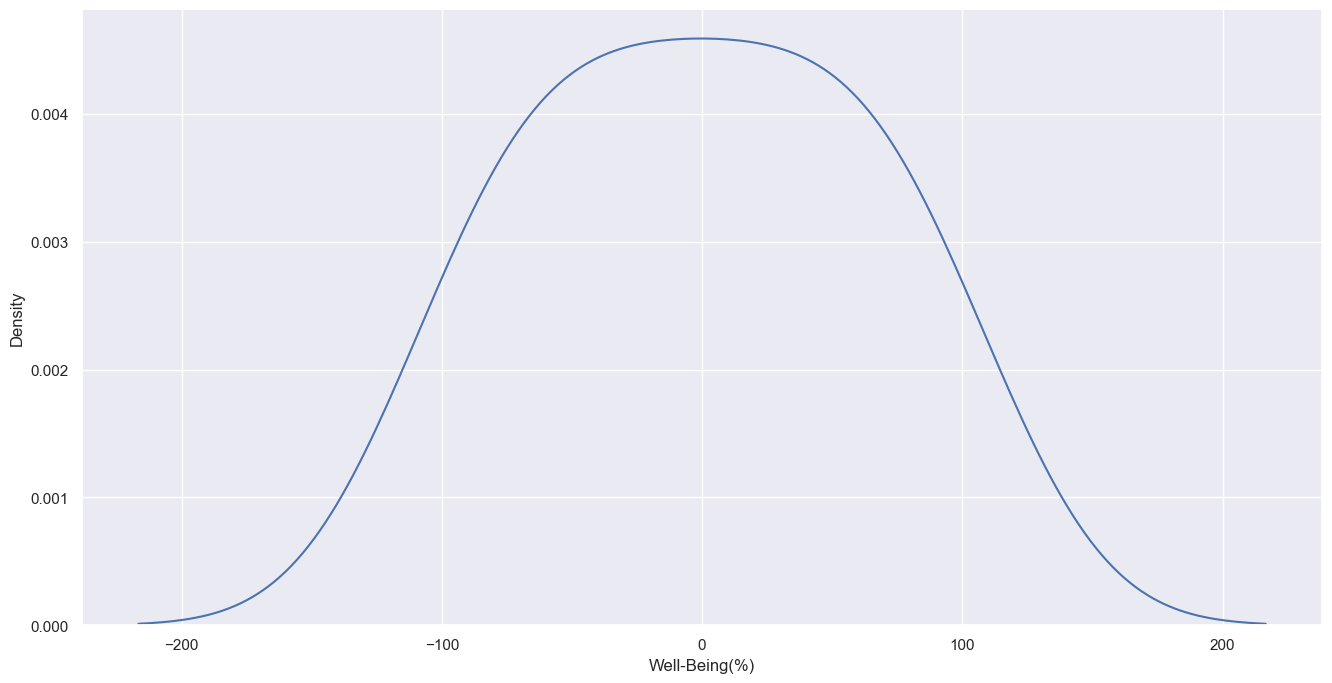

In [70]:
wellbeing_DF = combined_DF['Well-Being Assessment'].value_counts().reset_index()
wellbeing_DF.columns = ['Well-Being(%)', 'Count']

f = plt.figure(figsize=(24, 4))
sb.boxplot(data = wellbeing_DF, x="Well-Being(%)")
f = plt.figure(figsize=(16, 8))
sb.histplot(data=wellbeing_DF, x="Well-Being(%)")
plt.suptitle("Intensity Ranking")
plt.tight_layout()
plt.show()
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = wellbeing_DF, x="Well-Being(%)")

# End of Notebook